# Diamond Price Prediction

### Information about data

#### Features information
##### There are 10 independent variable and 1 dependent variable
##### Independent variables:
* 1- id:     Unique identifier of each diamond
* 2- carat:  Carat (ct.) refers to unique unit of weight measurement used exclusively to measure weight of gemstone and diamonds.
* 3- cut:    Quality of diamond cut
* 4- color:  Color of diamond
* 5- clarity: Diamond clarity is measure of purity and rarity of the stone graded by the visibility of these characteristics under 10-power magnification.
* 6- dept: Height of diamond in millimeters measured from bottom to top.
* 7- table: A diamonds table is facet that can be viewed when the stone is seen from top.
* 8- x: diamond X dimension
* 9- y: diamond Y dimension
* 10- z: diamond Z dimension

##### Dependent variables:
* price: price of diamond


### AIM

*  To predict the price of diamonds based on given independent variables.


### Type of probelm

* This is Regression problem

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('data/gemstone.csv') ## Data Ingestion

In [4]:
df1.shape

(193573, 11)

In [5]:
df1.isnull().sum()   ## No missing values
                     ## In future upcoming data there can be missing values so we need to create pipeline to handle those missing values.

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df1[df1.duplicated()] ## No duplicated values
                      ## In future upcoming data there can be duplicated values so we need to create pipeline to handle those duplicated  values.

,id,carat,cut,color,clarity,depth,table,x,y,z,price


In [8]:
df1['id'].unique()  ## Since id is unique for every value we can drop these column it will not affect prediction

array([     0,      1,      2, ..., 193570, 193571, 193572], dtype=int64)

In [9]:
df1.drop(columns='id',inplace=True)

In [10]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
## Segregatting the columns as categorical and non_categorical columns

categorical_columns = [column for column in df1.columns if df1[column].dtype == 'object']
print("Categorical columns: ",categorical_columns )
non_categorical_columns = [column for column in df1.columns if df1[column].dtype != 'object']
print("Non categorical columns: ",non_categorical_columns)


Categorical columns:  ['cut', 'color', 'clarity']
Non categorical columns:  ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [12]:
df1[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
df1[non_categorical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [14]:
for column in categorical_columns:
    print(df1[column].value_counts())
    print("__________________________")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
__________________________
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
__________________________
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
__________________________


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

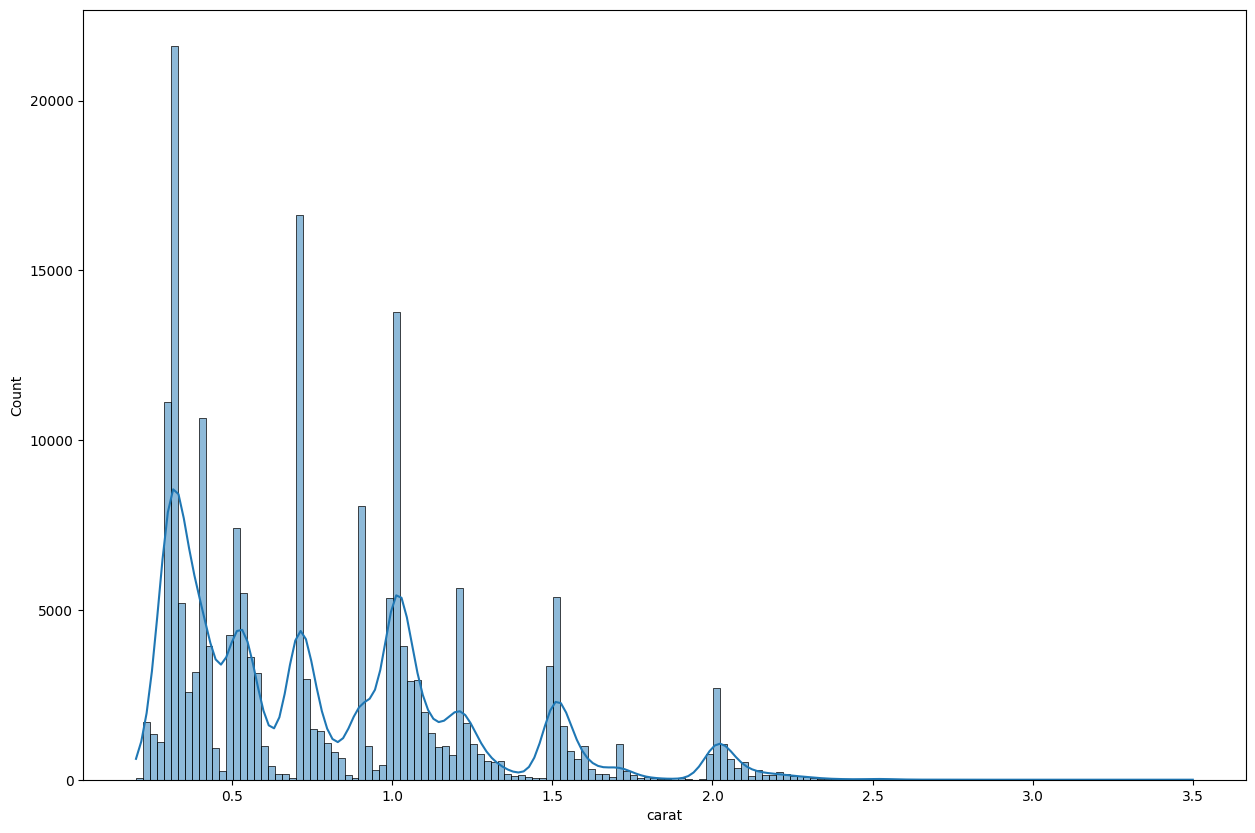

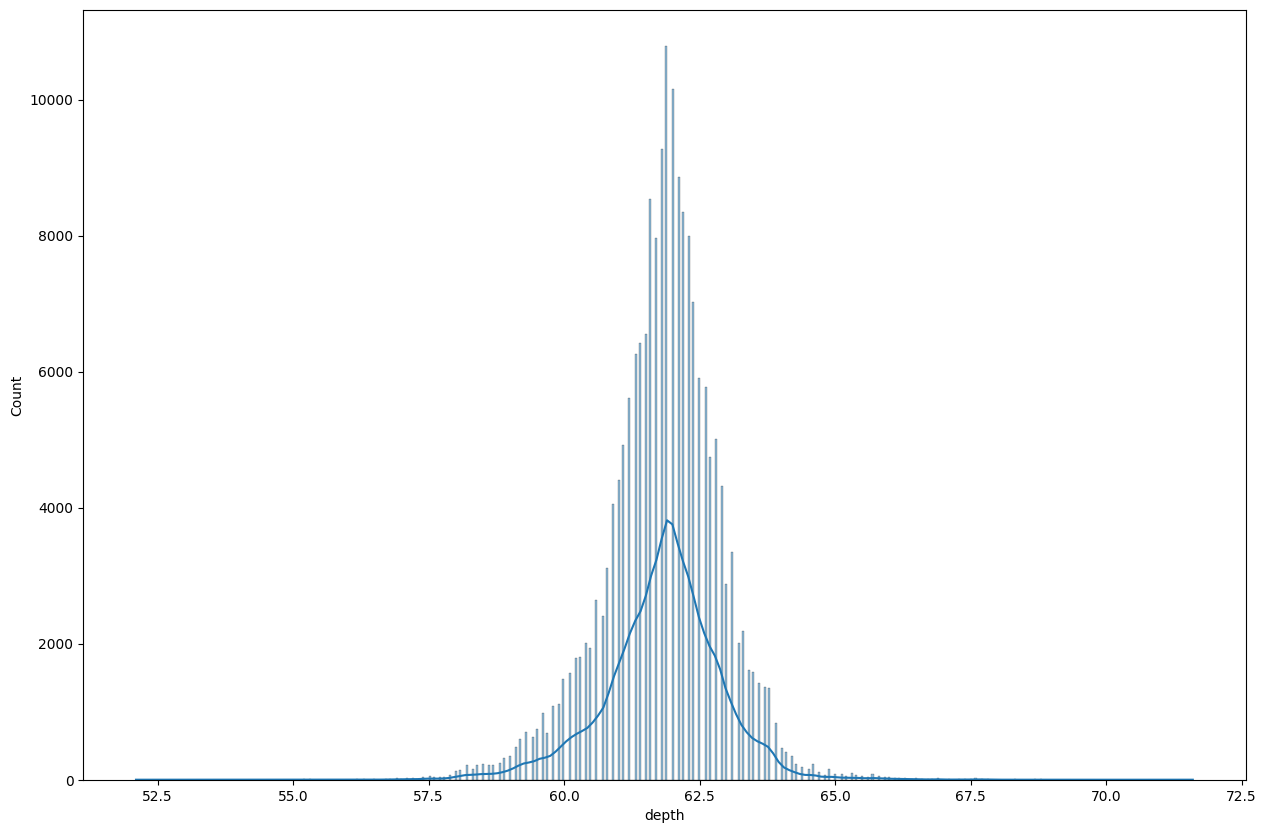

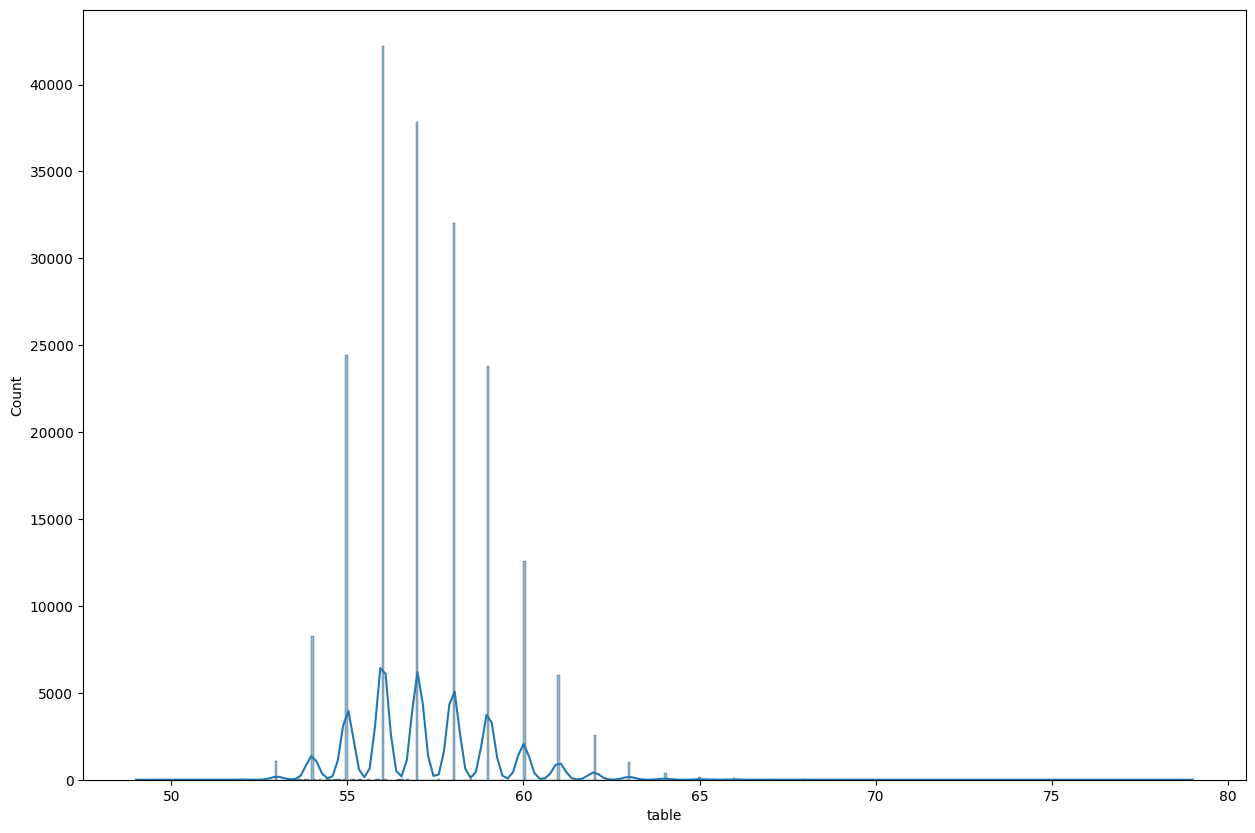

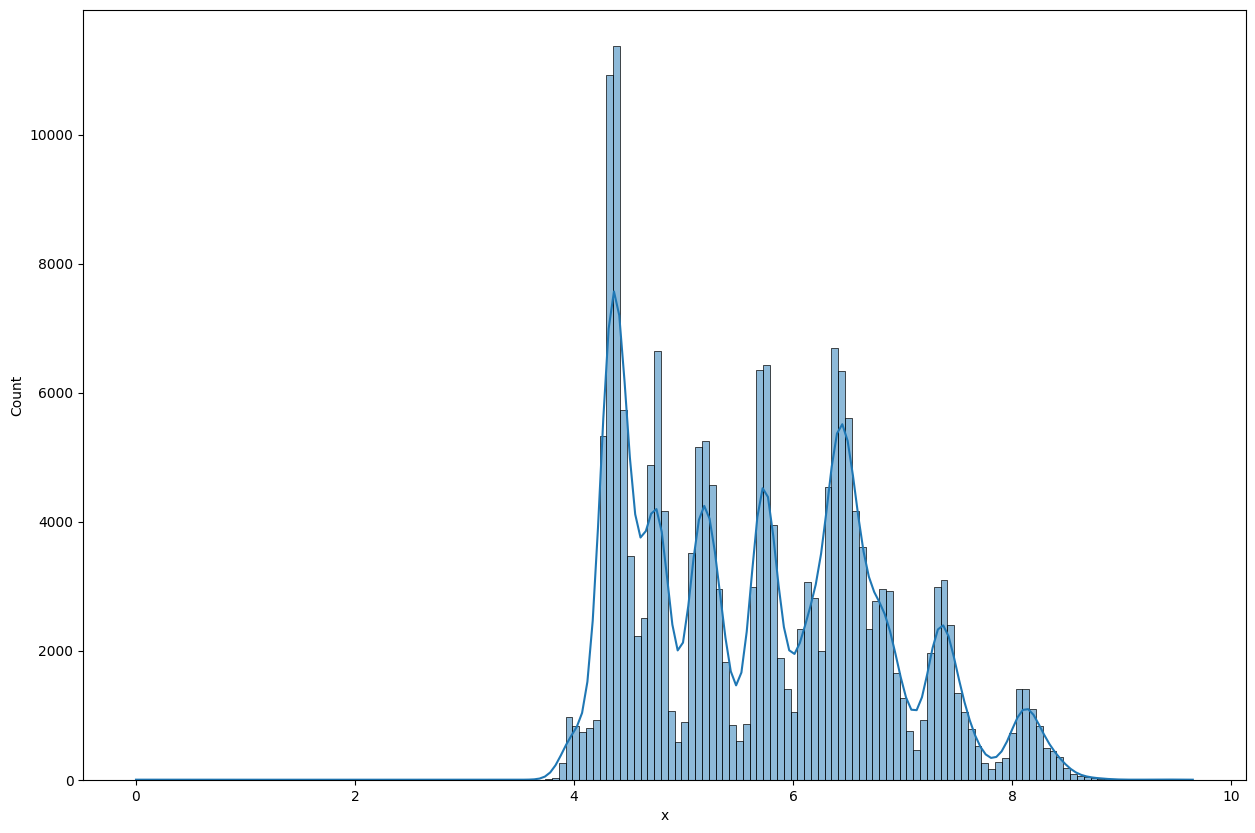

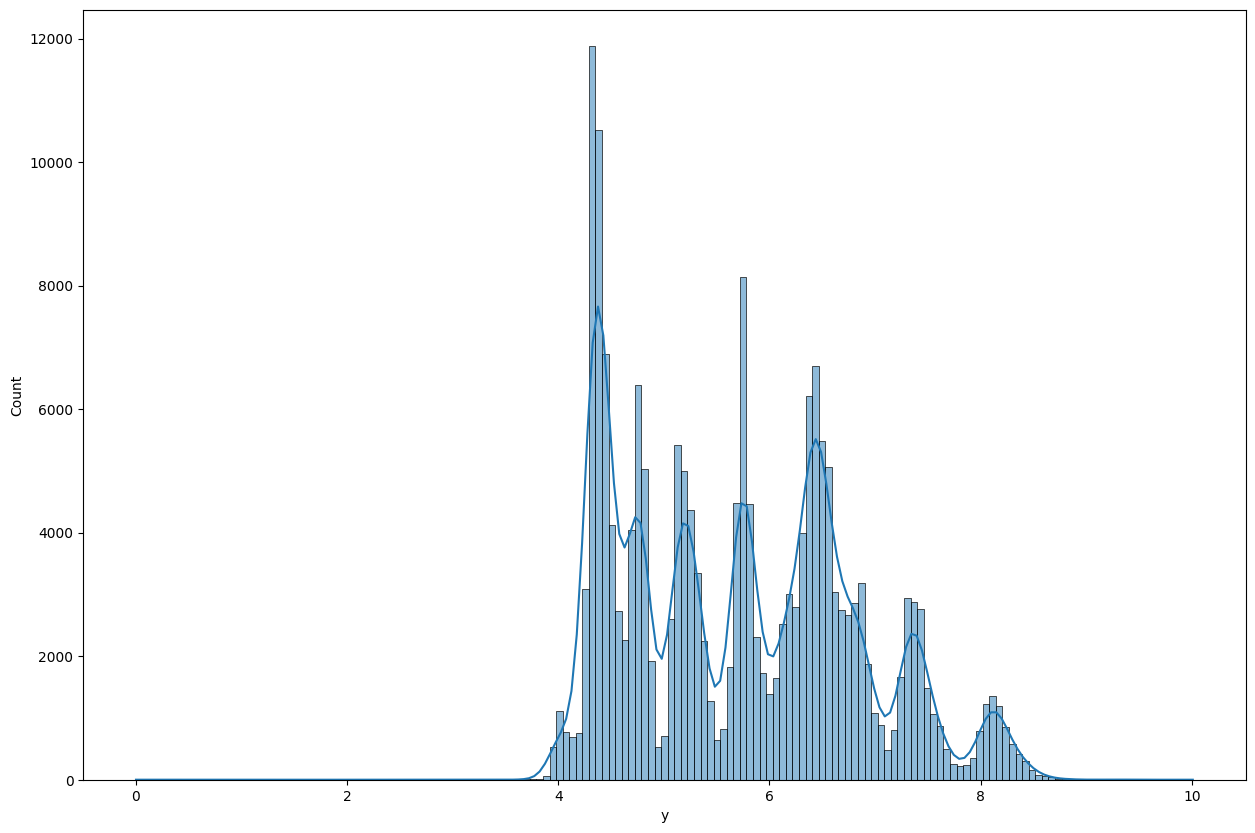

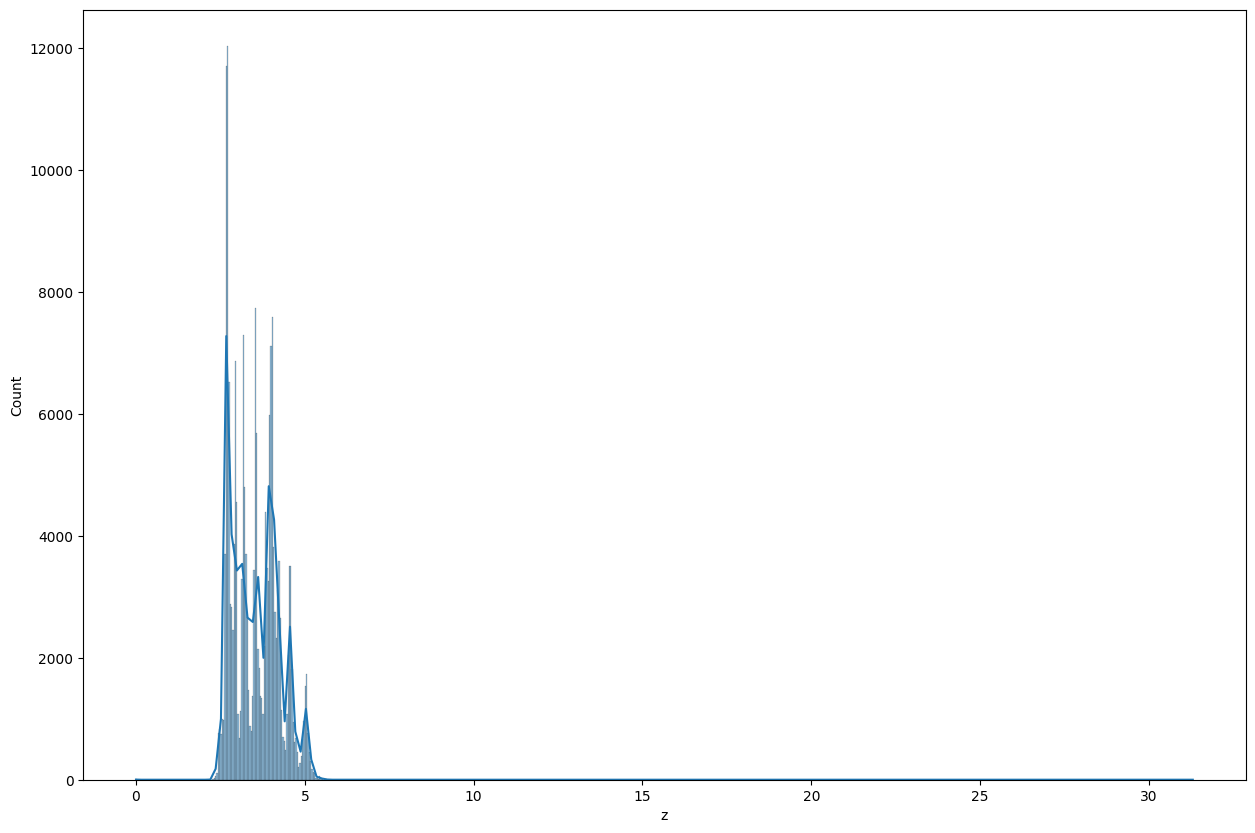

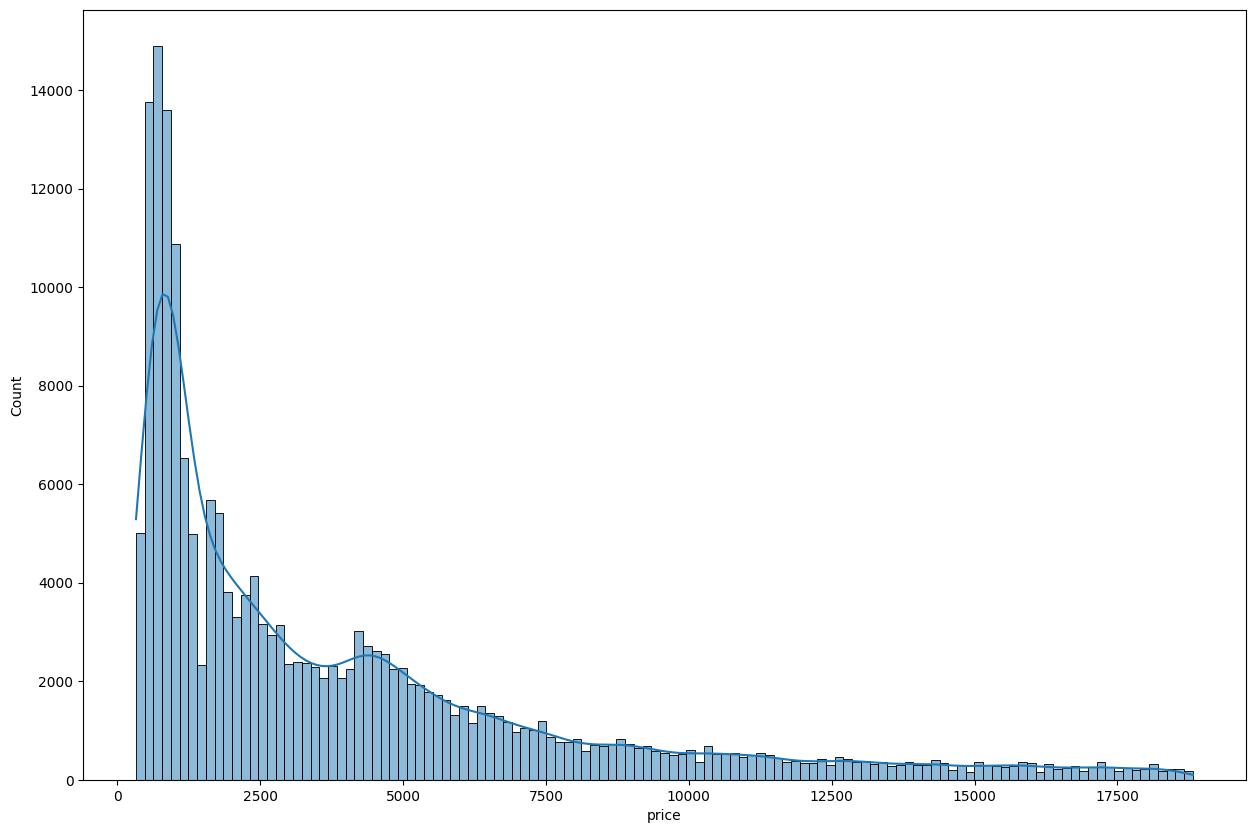

In [16]:
for x in non_categorical_columns:
   plt.figure(figsize=(15,10))
   sns.histplot(data=df1,x=x,kde=True)
   print("\n")
   plt.show()

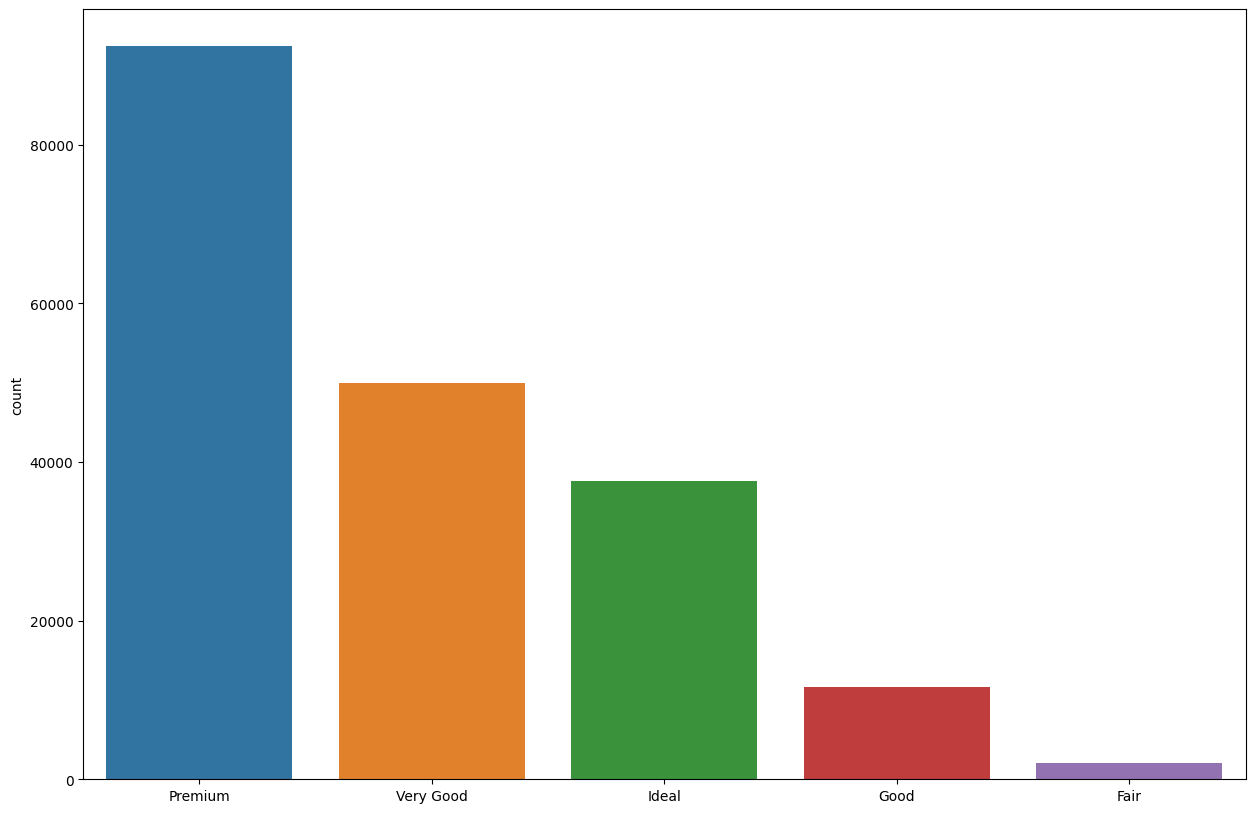

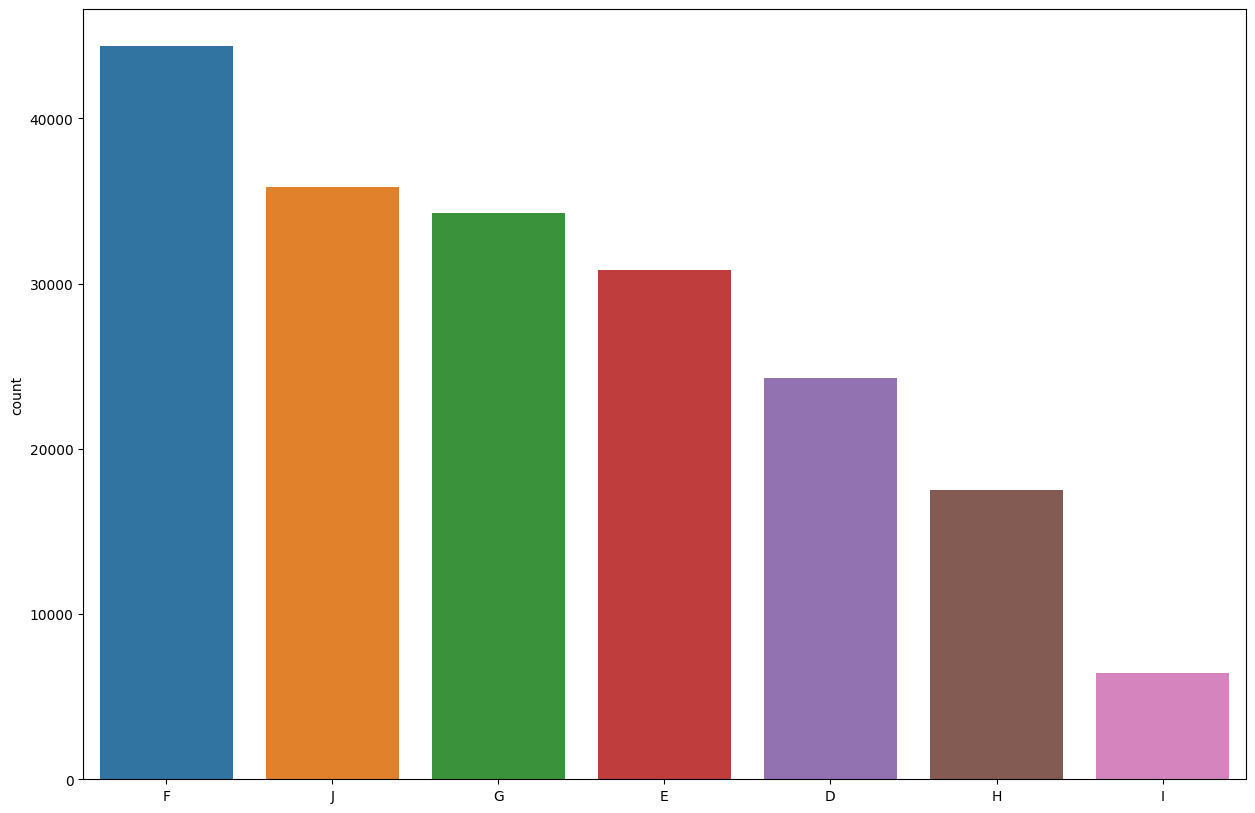

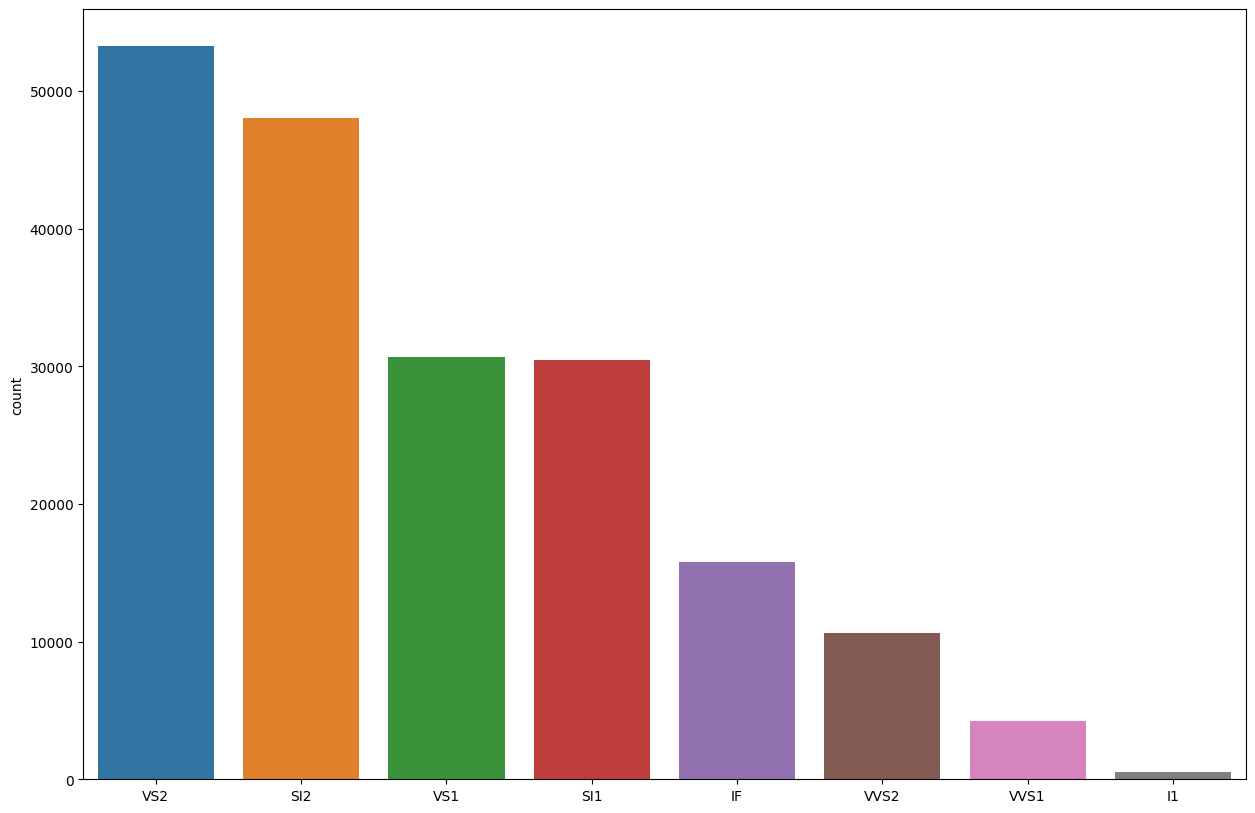

In [17]:
for i in categorical_columns:
   plt.figure(figsize=(15,10))
   sns.barplot(data=df1,x=df1[i].unique(),y=df1[i].value_counts())
   print("\n")
   plt.show()

<Axes: >

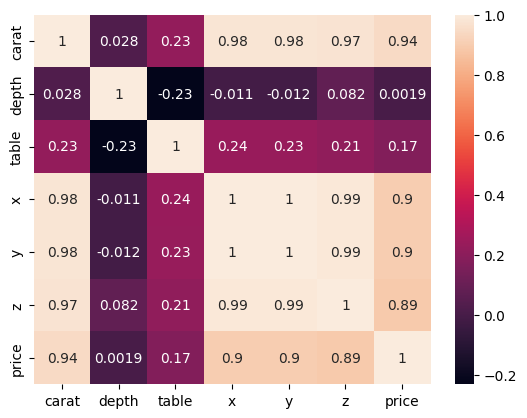

In [20]:
sns.heatmap(df1[non_categorical_columns].corr(),annot=True)

In [22]:
df1['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [28]:
cut_map = {'Premium':4, 'Very Good':3, 'Ideal':5, 'Good':2, 'Fair':1}

In [23]:
df1['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [26]:
color_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [24]:
df1['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [25]:
clarity_map = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}

In [29]:
df1['cut'] = df1['cut'].map(cut_map)
df1['color'] = df1['color'].map(color_map)
df1['clarity'] = df1['clarity'].map(clarity_map)

In [31]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 14.8 MB
